## PREDICT THE BURNED AREA OF FOREST FIRES WITH NEURAL NETWORKS


In [ ]:
# Importing libraries
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.filterwarnings('ignore')  

In [ ]:
from google.colab import files
uploaded=files.upload()

Saving forestfires (4).csv to forestfires (4).csv


In [ ]:
# loading dataset
forestfire_data = pd.read_csv('forestfires (4).csv')
forestfire_data 

month  day  FFMC    DMC     DC   ISI  temp  RH  wind  rain  ...  monthfeb  \
0     mar  fri  86.2   26.2   94.3   5.1   8.2  51   6.7   0.0  ...         0   
1     oct  tue  90.6   35.4  669.1   6.7  18.0  33   0.9   0.0  ...         0   
2     oct  sat  90.6   43.7  686.9   6.7  14.6  33   1.3   0.0  ...         0   
3     mar  fri  91.7   33.3   77.5   9.0   8.3  97   4.0   0.2  ...         0   
4     mar  sun  89.3   51.3  102.2   9.6  11.4  99   1.8   0.0  ...         0   
..    ...  ...   ...    ...    ...   ...   ...  ..   ...   ...  ...       ...   
512   aug  sun  81.6   56.7  665.6   1.9  27.8  32   2.7   0.0  ...         0   
513   aug  sun  81.6   56.7  665.6   1.9  21.9  71   5.8   0.0  ...         0   
514   aug  sun  81.6   56.7  665.6   1.9  21.2  70   6.7   0.0  ...         0   
515   aug  sat  94.4  146.0  614.7  11.3  25.6  42   4.0   0.0  ...         0   
516   nov  tue  79.5    3.0  106.7   1.1  11.8  31   4.5   0.0  ...         0   

     monthjan  monthjul  monthjun  monthmar  monthmay  monthnov  monthoct  \
0           0         0         0         1         0         0         0   
1           0         0         0         0         0         0         1   
2           0         0         0         0         0         0         1   
3           0         0         0         1         0         0         0   
4           0         0         0         1         0         0         0   
..        ...       ...       ...       ...       ...       ...       ...   
512         0         0         0         0         0         0         0   
513         0         0         0         0         0         0         0   
514         0         0         0         0         0         0         0   
515         0         0         0         0         0         0         0   
516         0         0         0         0         0         1         0   

     monthsep  size_category  
0           0          small  
1           0          small  
2           0          small  
3           0          small  
4           0          small  
..        ...            ...  
512         0          large  
513         0          large  
514         0          large  
515         0          small  
516         0          small  

[517 rows x 31 columns]

# EDA


In [ ]:
forestfire_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 31 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   month          517 non-null    object 
 1   day            517 non-null    object 
 2   FFMC           517 non-null    float64
 3   DMC            517 non-null    float64
 4   DC             517 non-null    float64
 5   ISI            517 non-null    float64
 6   temp           517 non-null    float64
 7   RH             517 non-null    int64  
 8   wind           517 non-null    float64
 9   rain           517 non-null    float64
 10  area           517 non-null    float64
 11  dayfri         517 non-null    int64  
 12  daymon         517 non-null    int64  
 13  daysat         517 non-null    int64  
 14  daysun         517 non-null    int64  
 15  daythu         517 non-null    int64  
 16  daytue         517 non-null    int64  
 17  daywed         517 non-null    int64  
 18  monthapr  

In [ ]:
forestfire_data.describe()

FFMC         DMC          DC         ISI        temp          RH  \
count  517.000000  517.000000  517.000000  517.000000  517.000000  517.000000   
mean    90.644681  110.872340  547.940039    9.021663   18.889168   44.288201   
std      5.520111   64.046482  248.066192    4.559477    5.806625   16.317469   
min     18.700000    1.100000    7.900000    0.000000    2.200000   15.000000   
25%     90.200000   68.600000  437.700000    6.500000   15.500000   33.000000   
50%     91.600000  108.300000  664.200000    8.400000   19.300000   42.000000   
75%     92.900000  142.400000  713.900000   10.800000   22.800000   53.000000   
max     96.200000  291.300000  860.600000   56.100000   33.300000  100.000000   

             wind        rain         area      dayfri  ...    monthdec  \
count  517.000000  517.000000   517.000000  517.000000  ...  517.000000   
mean     4.017602    0.021663    12.847292    0.164410  ...    0.017408   
std      1.791653    0.295959    63.655818    0.371006  ...    0.130913   
min      0.400000    0.000000     0.000000    0.000000  ...    0.000000   
25%      2.700000    0.000000     0.000000    0.000000  ...    0.000000   
50%      4.000000    0.000000     0.520000    0.000000  ...    0.000000   
75%      4.900000    0.000000     6.570000    0.000000  ...    0.000000   
max      9.400000    6.400000  1090.840000    1.000000  ...    1.000000   

         monthfeb    monthjan    monthjul    monthjun    monthmar    monthmay  \
count  517.000000  517.000000  517.000000  517.000000  517.000000  517.000000   
mean     0.038685    0.003868    0.061896    0.032882    0.104449    0.003868   
std      0.193029    0.062137    0.241199    0.178500    0.306138    0.062137   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
50%      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
75%      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
max      1.000000    1.000000    1.000000    1.000000    1.000000    1.000000   

         monthnov    monthoct    monthsep  
count  517.000000  517.000000  517.000000  
mean     0.001934    0.029014    0.332689  
std      0.043980    0.168007    0.471632  
min      0.000000    0.000000    0.000000  
25%      0.000000    0.000000    0.000000  
50%      0.000000    0.000000    0.000000  
75%      0.000000    0.000000    1.000000  
max      1.000000    1.000000    1.000000  

[8 rows x 28 columns]

In [ ]:
forestfire_data.isna().sum()

month            0
day              0
FFMC             0
DMC              0
DC               0
ISI              0
temp             0
RH               0
wind             0
rain             0
area             0
dayfri           0
daymon           0
daysat           0
daysun           0
daythu           0
daytue           0
daywed           0
monthapr         0
monthaug         0
monthdec         0
monthfeb         0
monthjan         0
monthjul         0
monthjun         0
monthmar         0
monthmay         0
monthnov         0
monthoct         0
monthsep         0
size_category    0
dtype: int64

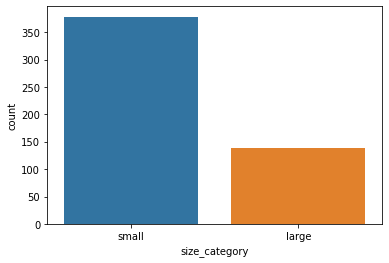

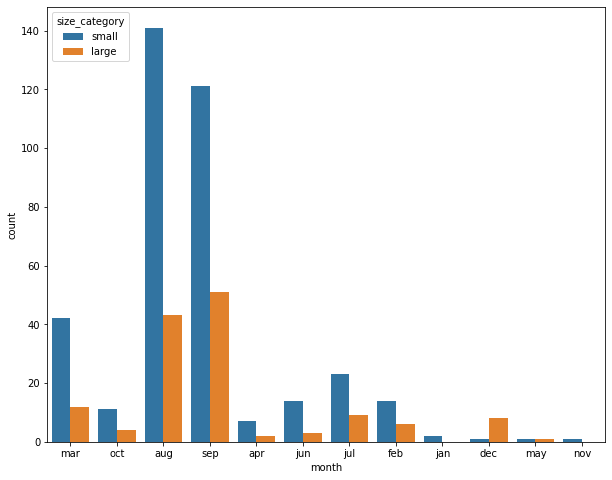

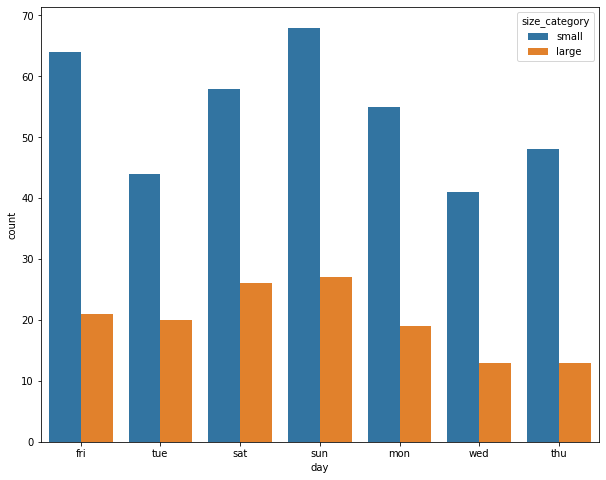

In [ ]:
sns.countplot(forestfire_data['size_category'])
plt.show()

plt.figure(figsize=(10,8))
sns.countplot(x = forestfire_data['month'],hue=forestfire_data['size_category'])
plt.show() 

plt.figure(figsize=(10,8))
sns.countplot(x = forestfire_data['day'],hue=forestfire_data['size_category'])
plt.show() 

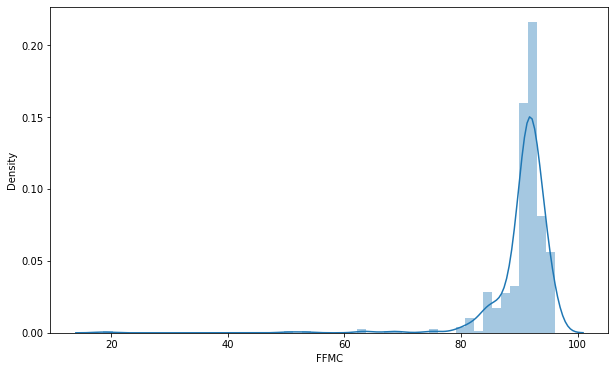

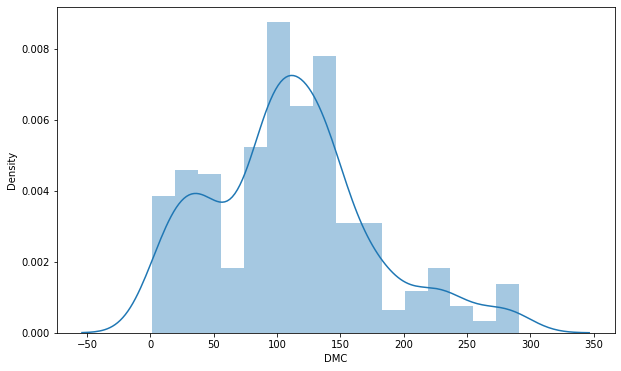

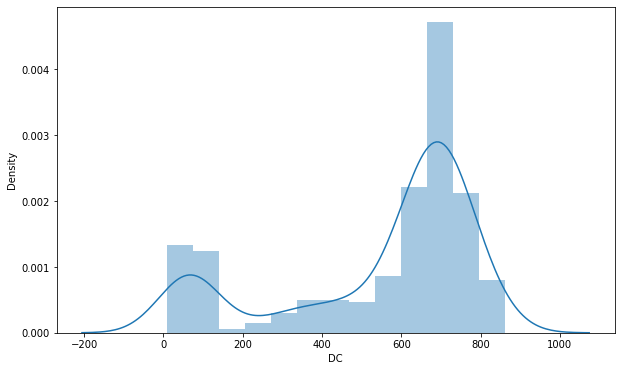

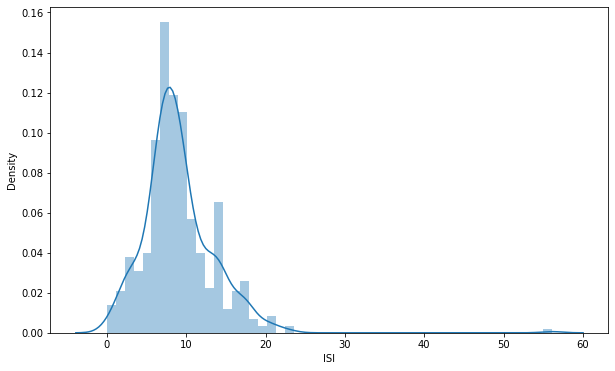

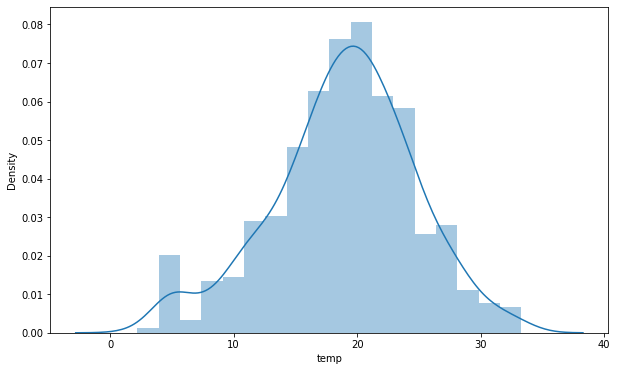

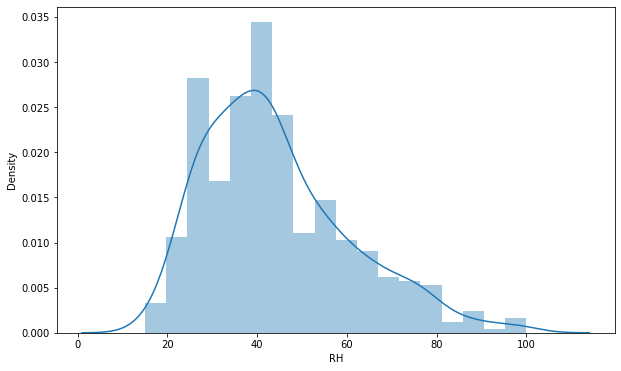

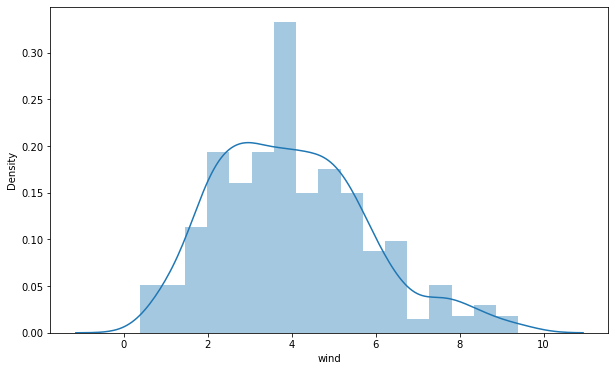

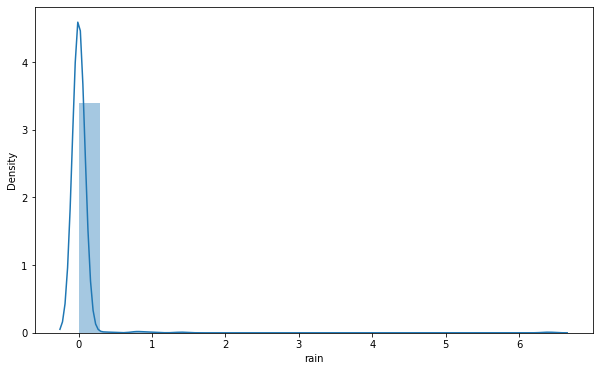

In [ ]:
plt.figure(figsize=(10,6))
sns.distplot(forestfire_data['FFMC'])
plt.show()

plt.figure(figsize=(10,6))
sns.distplot(forestfire_data['DMC'],)
plt.show()

plt.figure(figsize=(10,6))
sns.distplot(forestfire_data['DC'],)
plt.show()


plt.figure(figsize=(10,6))
sns.distplot(forestfire_data['ISI'],)
plt.show()

plt.figure(figsize=(10,6))
sns.distplot(forestfire_data['temp'],)
plt.show()

plt.figure(figsize=(10,6))
sns.distplot(forestfire_data['RH'],)
plt.show() 

plt.figure(figsize=(10,6))
sns.distplot(forestfire_data['wind'],)
plt.show()

plt.figure(figsize=(10,6))
sns.distplot(forestfire_data['rain'],)
plt.show() 

In [ ]:
data = forestfire_data.drop(labels=['month','day'],axis = 1)
data 

FFMC    DMC     DC   ISI  temp  RH  wind  rain   area  dayfri  ...  \
0    86.2   26.2   94.3   5.1   8.2  51   6.7   0.0   0.00       1  ...   
1    90.6   35.4  669.1   6.7  18.0  33   0.9   0.0   0.00       0  ...   
2    90.6   43.7  686.9   6.7  14.6  33   1.3   0.0   0.00       0  ...   
3    91.7   33.3   77.5   9.0   8.3  97   4.0   0.2   0.00       1  ...   
4    89.3   51.3  102.2   9.6  11.4  99   1.8   0.0   0.00       0  ...   
..    ...    ...    ...   ...   ...  ..   ...   ...    ...     ...  ...   
512  81.6   56.7  665.6   1.9  27.8  32   2.7   0.0   6.44       0  ...   
513  81.6   56.7  665.6   1.9  21.9  71   5.8   0.0  54.29       0  ...   
514  81.6   56.7  665.6   1.9  21.2  70   6.7   0.0  11.16       0  ...   
515  94.4  146.0  614.7  11.3  25.6  42   4.0   0.0   0.00       0  ...   
516  79.5    3.0  106.7   1.1  11.8  31   4.5   0.0   0.00       0  ...   

     monthfeb  monthjan  monthjul  monthjun  monthmar  monthmay  monthnov  \
0           0         0         0         0         1         0         0   
1           0         0         0         0         0         0         0   
2           0         0         0         0         0         0         0   
3           0         0         0         0         1         0         0   
4           0         0         0         0         1         0         0   
..        ...       ...       ...       ...       ...       ...       ...   
512         0         0         0         0         0         0         0   
513         0         0         0         0         0         0         0   
514         0         0         0         0         0         0         0   
515         0         0         0         0         0         0         0   
516         0         0         0         0         0         0         1   

     monthoct  monthsep  size_category  
0           0         0          small  
1           1         0          small  
2           1         0          small  
3           0         0          small  
4           0         0          small  
..        ...       ...            ...  
512         0         0          large  
513         0         0          large  
514         0         0          large  
515         0         0          small  
516         0         0          small  

[517 rows x 29 columns]

In [ ]:
le = LabelEncoder()
data['size_category'] = le.fit_transform(data['size_category'])
data

FFMC    DMC     DC   ISI  temp  RH  wind  rain   area  dayfri  ...  \
0    86.2   26.2   94.3   5.1   8.2  51   6.7   0.0   0.00       1  ...   
1    90.6   35.4  669.1   6.7  18.0  33   0.9   0.0   0.00       0  ...   
2    90.6   43.7  686.9   6.7  14.6  33   1.3   0.0   0.00       0  ...   
3    91.7   33.3   77.5   9.0   8.3  97   4.0   0.2   0.00       1  ...   
4    89.3   51.3  102.2   9.6  11.4  99   1.8   0.0   0.00       0  ...   
..    ...    ...    ...   ...   ...  ..   ...   ...    ...     ...  ...   
512  81.6   56.7  665.6   1.9  27.8  32   2.7   0.0   6.44       0  ...   
513  81.6   56.7  665.6   1.9  21.9  71   5.8   0.0  54.29       0  ...   
514  81.6   56.7  665.6   1.9  21.2  70   6.7   0.0  11.16       0  ...   
515  94.4  146.0  614.7  11.3  25.6  42   4.0   0.0   0.00       0  ...   
516  79.5    3.0  106.7   1.1  11.8  31   4.5   0.0   0.00       0  ...   

     monthfeb  monthjan  monthjul  monthjun  monthmar  monthmay  monthnov  \
0           0         0         0         0         1         0         0   
1           0         0         0         0         0         0         0   
2           0         0         0         0         0         0         0   
3           0         0         0         0         1         0         0   
4           0         0         0         0         1         0         0   
..        ...       ...       ...       ...       ...       ...       ...   
512         0         0         0         0         0         0         0   
513         0         0         0         0         0         0         0   
514         0         0         0         0         0         0         0   
515         0         0         0         0         0         0         0   
516         0         0         0         0         0         0         1   

     monthoct  monthsep  size_category  
0           0         0              1  
1           1         0              1  
2           1         0              1  
3           0         0              1  
4           0         0              1  
..        ...       ...            ...  
512         0         0              0  
513         0         0              0  
514         0         0              0  
515         0         0              1  
516         0         0              1  

[517 rows x 29 columns]

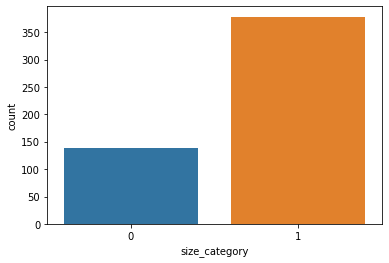

In [ ]:
sns.countplot(data['size_category']) 
plt.show() 

In [ ]:
data['size_category'].replace({'small':0,'large':0},inplace = True) 

In [ ]:
data

FFMC    DMC     DC   ISI  temp  RH  wind  rain   area  dayfri  ...  \
0    86.2   26.2   94.3   5.1   8.2  51   6.7   0.0   0.00       1  ...   
1    90.6   35.4  669.1   6.7  18.0  33   0.9   0.0   0.00       0  ...   
2    90.6   43.7  686.9   6.7  14.6  33   1.3   0.0   0.00       0  ...   
3    91.7   33.3   77.5   9.0   8.3  97   4.0   0.2   0.00       1  ...   
4    89.3   51.3  102.2   9.6  11.4  99   1.8   0.0   0.00       0  ...   
..    ...    ...    ...   ...   ...  ..   ...   ...    ...     ...  ...   
512  81.6   56.7  665.6   1.9  27.8  32   2.7   0.0   6.44       0  ...   
513  81.6   56.7  665.6   1.9  21.9  71   5.8   0.0  54.29       0  ...   
514  81.6   56.7  665.6   1.9  21.2  70   6.7   0.0  11.16       0  ...   
515  94.4  146.0  614.7  11.3  25.6  42   4.0   0.0   0.00       0  ...   
516  79.5    3.0  106.7   1.1  11.8  31   4.5   0.0   0.00       0  ...   

     monthfeb  monthjan  monthjul  monthjun  monthmar  monthmay  monthnov  \
0           0         0         0         0         1         0         0   
1           0         0         0         0         0         0         0   
2           0         0         0         0         0         0         0   
3           0         0         0         0         1         0         0   
4           0         0         0         0         1         0         0   
..        ...       ...       ...       ...       ...       ...       ...   
512         0         0         0         0         0         0         0   
513         0         0         0         0         0         0         0   
514         0         0         0         0         0         0         0   
515         0         0         0         0         0         0         0   
516         0         0         0         0         0         0         1   

     monthoct  monthsep  size_category  
0           0         0              1  
1           1         0              1  
2           1         0              1  
3           0         0              1  
4           0         0              1  
..        ...       ...            ...  
512         0         0              0  
513         0         0              0  
514         0         0              0  
515         0         0              1  
516         0         0              1  

[517 rows x 29 columns]

# Correlation

In [ ]:
corr=data.corr()
corr 

FFMC       DMC        DC       ISI      temp        RH  \
FFMC           1.000000  0.382619  0.330512  0.531805  0.431532 -0.300995   
DMC            0.382619  1.000000  0.682192  0.305128  0.469594  0.073795   
DC             0.330512  0.682192  1.000000  0.229154  0.496208 -0.039192   
ISI            0.531805  0.305128  0.229154  1.000000  0.394287 -0.132517   
temp           0.431532  0.469594  0.496208  0.394287  1.000000 -0.527390   
RH            -0.300995  0.073795 -0.039192 -0.132517 -0.527390  1.000000   
wind          -0.028485 -0.105342 -0.203466  0.106826 -0.227116  0.069410   
rain           0.056702  0.074790  0.035861  0.067668  0.069491  0.099751   
area           0.040122  0.072994  0.049383  0.008258  0.097844 -0.075519   
dayfri         0.019306 -0.012010 -0.004220  0.046695 -0.071949  0.064506   
daymon        -0.059396 -0.107921 -0.052993 -0.158601 -0.136529  0.009376   
daysat        -0.019637 -0.003653 -0.035189 -0.038585  0.034899 -0.023869   
daysun        -0.089517  0.025355 -0.001431 -0.003243  0.014403  0.136220   
daythu         0.071730  0.087672  0.051859 -0.022406  0.051432 -0.123061   
daytue         0.011225  0.000016  0.028368  0.068610  0.035630 -0.014211   
daywed         0.093908  0.017939  0.024803  0.125415  0.090580 -0.087508   
monthapr      -0.117199 -0.197543 -0.268211 -0.106478 -0.157051  0.021235   
monthaug       0.228103  0.497928  0.279361  0.334639  0.351404  0.054761   
monthdec      -0.137044 -0.176301 -0.105642 -0.162322 -0.329648 -0.047714   
monthfeb      -0.281535 -0.317899 -0.399277 -0.249777 -0.320015  0.140430   
monthjan      -0.454771 -0.105647 -0.115064 -0.103588 -0.146520  0.170923   
monthjul       0.031833 -0.001946 -0.100887  0.020982  0.142588  0.013185   
monthjun      -0.040634 -0.050403 -0.186183  0.111516  0.051015  0.009382   
monthmar      -0.074327 -0.407404 -0.650427 -0.143520 -0.341797 -0.089836   
monthmay      -0.037230 -0.081980 -0.114209 -0.060493 -0.045540  0.086822   
monthnov      -0.088964 -0.074218 -0.078380 -0.076559 -0.053798 -0.035885   
monthoct      -0.005998 -0.187632  0.093279 -0.071154 -0.053513 -0.072334   
monthsep       0.076609  0.110907  0.531857 -0.068877  0.088006 -0.062596   
size_category -0.022063 -0.034715 -0.019428  0.008726 -0.006021  0.045243   

                   wind      rain      area    dayfri  ...  monthfeb  \
FFMC          -0.028485  0.056702  0.040122  0.019306  ... -0.281535   
DMC           -0.105342  0.074790  0.072994 -0.012010  ... -0.317899   
DC            -0.203466  0.035861  0.049383 -0.004220  ... -0.399277   
ISI            0.106826  0.067668  0.008258  0.046695  ... -0.249777   
temp          -0.227116  0.069491  0.097844 -0.071949  ... -0.320015   
RH             0.069410  0.099751 -0.075519  0.064506  ...  0.140430   
wind           1.000000  0.061119  0.012317  0.118090  ... -0.029431   
rain           0.061119  1.000000 -0.007366 -0.004261  ... -0.014698   
area           0.012317 -0.007366  1.000000 -0.052911  ... -0.020732   
dayfri         0.118090 -0.004261 -0.052911  1.000000  ...  0.046323   
daymon        -0.063881 -0.029945 -0.021206 -0.181293  ...  0.003933   
daysat        -0.063799 -0.032271  0.087868 -0.195372  ...  0.020406   
daysun         0.027981 -0.017872 -0.020463 -0.210462  ...  0.008416   
daythu        -0.062553 -0.026798  0.020121 -0.162237  ... -0.042278   
daytue         0.053396  0.139311 -0.001333 -0.166728  ... -0.014491   
daywed        -0.019965 -0.020744 -0.011452 -0.151487  ... -0.035713   
monthapr       0.048266 -0.009752 -0.008280 -0.019140  ... -0.026701   
monthaug       0.028577  0.093101 -0.004187 -0.100837  ... -0.149116   
monthdec       0.269702 -0.009752  0.001010 -0.019140  ... -0.026701   
monthfeb      -0.029431 -0.014698 -0.020732  0.046323  ...  1.000000   
monthjan      -0.070245 -0.004566 -0.012589 -0.027643  ... -0.012501   
monthjul      -0.040645 -0.013390  0.006149 -0.048969  ... -0.051528   
monthjun       0.012124 -0.013510 -0.020314  0.00600

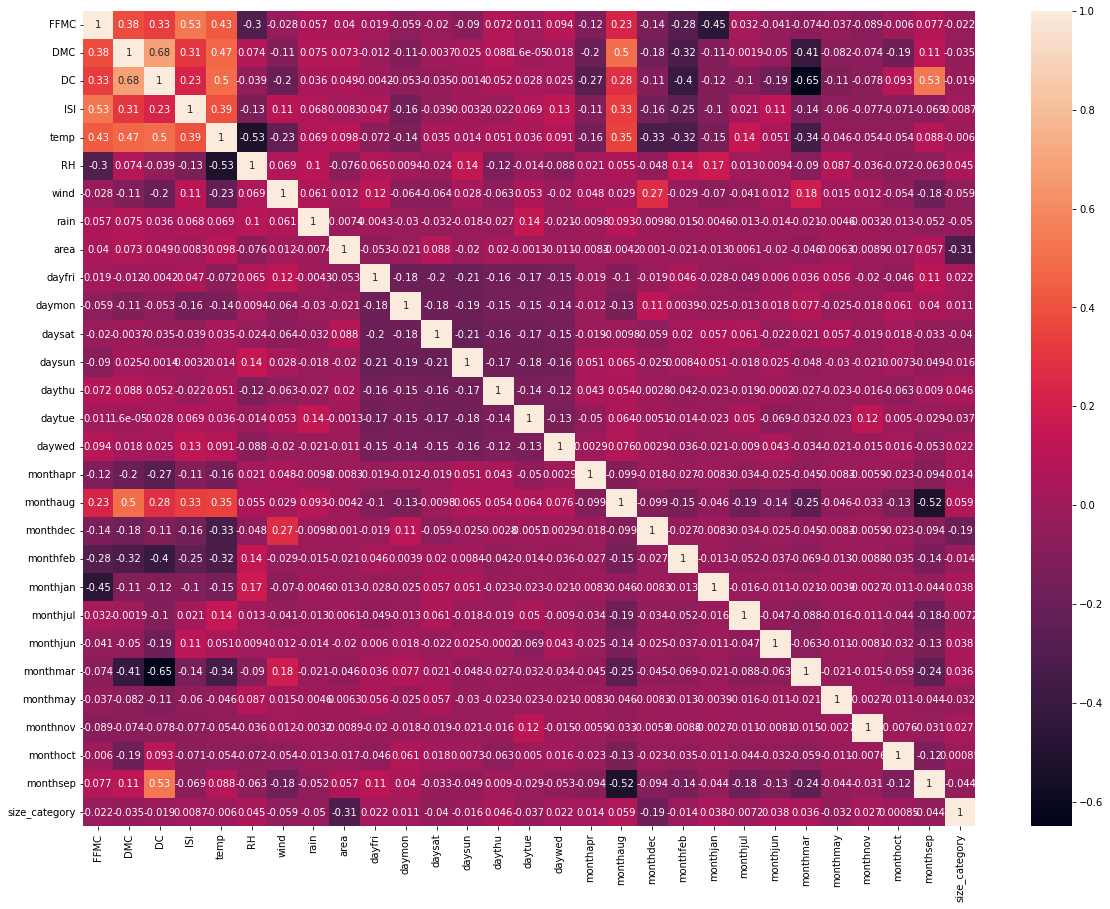

In [ ]:
plt.figure(figsize=(20,15))
sns.heatmap(corr,annot=True)
plt.show() 

# Model Building

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_regression  

In [ ]:
X=data.iloc[:,0:-1]
y=data.iloc[:,28]

In [ ]:
X

FFMC    DMC     DC   ISI  temp  RH  wind  rain   area  dayfri  ...  \
0    86.2   26.2   94.3   5.1   8.2  51   6.7   0.0   0.00       1  ...   
1    90.6   35.4  669.1   6.7  18.0  33   0.9   0.0   0.00       0  ...   
2    90.6   43.7  686.9   6.7  14.6  33   1.3   0.0   0.00       0  ...   
3    91.7   33.3   77.5   9.0   8.3  97   4.0   0.2   0.00       1  ...   
4    89.3   51.3  102.2   9.6  11.4  99   1.8   0.0   0.00       0  ...   
..    ...    ...    ...   ...   ...  ..   ...   ...    ...     ...  ...   
512  81.6   56.7  665.6   1.9  27.8  32   2.7   0.0   6.44       0  ...   
513  81.6   56.7  665.6   1.9  21.9  71   5.8   0.0  54.29       0  ...   
514  81.6   56.7  665.6   1.9  21.2  70   6.7   0.0  11.16       0  ...   
515  94.4  146.0  614.7  11.3  25.6  42   4.0   0.0   0.00       0  ...   
516  79.5    3.0  106.7   1.1  11.8  31   4.5   0.0   0.00       0  ...   

     monthdec  monthfeb  monthjan  monthjul  monthjun  monthmar  monthmay  \
0           0         0         0         0         0         1         0   
1           0         0         0         0         0         0         0   
2           0         0         0         0         0         0         0   
3           0         0         0         0         0         1         0   
4           0         0         0         0         0         1         0   
..        ...       ...       ...       ...       ...       ...       ...   
512         0         0         0         0         0         0         0   
513         0         0         0         0         0         0         0   
514         0         0         0         0         0         0         0   
515         0         0         0         0         0         0         0   
516         0         0         0         0         0         0         0   

     monthnov  monthoct  monthsep  
0           0         0         0  
1           0         1         0  
2           0         1         0  
3           0         0         0  
4           0         0         0  
..        ...       ...       ...  
512         0         0         0  
513         0         0         0  
514         0         0         0  
515         0         0         0  
516         1         0         0  

[517 rows x 28 columns]

In [ ]:
y

0      1
1      1
2      1
3      1
4      1
      ..
512    0
513    0
514    0
515    1
516    1
Name: size_category, Length: 517, dtype: int64

In [ ]:
x_train, x_test, y_train, y_test  = train_test_split(X,y,test_size=0.30,random_state=12) 

In [ ]:
x_train.shape,y_train.shape 

((361, 28), (361,))

In [ ]:
y_train.shape,y_train.shape 

((361,), (361,))

Data Is Imbalance so we have to balance it , so using here smote operation of balancing technique

In [ ]:
import imblearn
from imblearn.over_sampling import SMOTE 

In [ ]:
sm = SMOTE(random_state=12)
x_train_sm,y_train_sm = sm.fit_resample(x_train,np.array(y_train).ravel())
x_train_sm,y_train_sm

(          FFMC         DMC          DC        ISI       temp  RH      wind  \
 0    93.700000  101.300000  458.800000  11.900000  19.300000  39  7.200000   
 1    92.800000  119.000000  783.500000   7.500000  16.800000  28  4.000000   
 2    92.100000  152.600000  658.200000  14.300000  20.200000  47  4.000000   
 3    93.700000  101.300000  423.400000  14.700000  26.100000  45  4.000000   
 4    90.800000   41.900000   89.400000   7.900000  13.300000  42  0.900000   
 ..         ...         ...         ...        ...        ...  ..       ...   
 533  91.372665  137.325971  680.945740   9.473142  16.000477  58  5.690184   
 534  87.307221   10.323502   25.368854   7.059981   9.503587  39  6.480038   
 535  93.839786   81.878499  686.854129  17.434048  22.477775  30  4.900000   
 536  91.810487  169.218024  632.028060  10.420531  20.563220  53  3.168242   
 537  93.914567  165.944421  706.169390  15.226172  20.152591  49  4.182222   
 
      rain       area  dayfri  ...  monthdec  mont

In [ ]:
x_train_sm.shape,y_train_sm.shape

((538, 28), (538,))

In [ ]:
x_train = x_train_sm.copy()
y_train = y_train_sm.copy()

In [ ]:
x_train

FFMC         DMC          DC        ISI       temp  RH      wind  \
0    93.700000  101.300000  458.800000  11.900000  19.300000  39  7.200000   
1    92.800000  119.000000  783.500000   7.500000  16.800000  28  4.000000   
2    92.100000  152.600000  658.200000  14.300000  20.200000  47  4.000000   
3    93.700000  101.300000  423.400000  14.700000  26.100000  45  4.000000   
4    90.800000   41.900000   89.400000   7.900000  13.300000  42  0.900000   
..         ...         ...         ...        ...        ...  ..       ...   
533  91.372665  137.325971  680.945740   9.473142  16.000477  58  5.690184   
534  87.307221   10.323502   25.368854   7.059981   9.503587  39  6.480038   
535  93.839786   81.878499  686.854129  17.434048  22.477775  30  4.900000   
536  91.810487  169.218024  632.028060  10.420531  20.563220  53  3.168242   
537  93.914567  165.944421  706.169390  15.226172  20.152591  49  4.182222   

     rain       area  dayfri  ...  monthdec  monthfeb  monthjan  monthjul  \
0     0.0   7.730000       0  ...         0         0         0         1   
1     0.0   7.210000       0  ...         0         0         0         0   
2     0.0   3.090000       0  ...         0         0         0         0   
3     0.0   7.360000       0  ...         0         0         0         1   
4     0.0   7.400000       0  ...         0         0         0         0   
..    ...        ...     ...  ...       ...       ...       ...       ...   
533   0.0  10.572590       0  ...         0         0         0         0   
534   0.0  18.149787       0  ...         0         0         0         0   
535   0.0  24.043695       0  ...         0         0         0         0   
536   0.0  13.166840       0  ...         0         0         0         0   
537   0.0  26.354207       0  ...         0         0         0         0   

     monthjun  monthmar  monthmay  monthnov  monthoct  monthsep  
0           0         0         0         0         0         0  
1           0         0         0         0         0         1  
2           0         0         0         0         0         0  
3           0         0         0         0         0         0  
4           0         1         0         0         0         0  
..        ...       ...       ...       ...       ...       ...  
533         0         0         0         0         0         0  
534         0         0         0         0         0         0  
535         0         0         0         0         0         1  
536         0         0         0         0         0         0  
537         0         0         0         0         0         0  

[538 rows x 28 columns]

In [ ]:
y_train

array([0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0,
       1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0,
       1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,

# Convert Data into standard scale

In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
scale = MinMaxScaler()
X_train = scale.fit_transform(x_train)
X_train 

array([[0.96774194, 0.34683281, 0.53209818, ..., 0.        , 0.        ,
        0.        ],
       [0.95612903, 0.40809969, 0.91527024, ..., 0.        , 0.        ,
        1.        ],
       [0.94709677, 0.52440291, 0.76740618, ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.96954562, 0.27960713, 0.80122036, ..., 0.        , 0.        ,
        1.        ],
       [0.94336113, 0.58192462, 0.73652119, ..., 0.        , 0.        ,
        0.        ],
       [0.97051055, 0.57059336, 0.82401391, ..., 0.        , 0.        ,
        0.        ]])

In [ ]:
X_test = scale.fit_transform(x_test)
X_test 

array([[0.93251534, 0.57586327, 0.45927711, ..., 0.        , 0.        ,
        0.        ],
       [0.9202454 , 0.47017789, 0.67903614, ..., 0.        , 0.        ,
        0.        ],
       [0.84662577, 0.291594  , 0.8446988 , ..., 0.        , 0.        ,
        1.        ],
       ...,
       [0.82822086, 0.67038716, 0.74614458, ..., 0.        , 0.        ,
        0.        ],
       [0.88650307, 0.416812  , 0.78325301, ..., 0.        , 0.        ,
        1.        ],
       [0.9202454 , 0.47017789, 0.67903614, ..., 0.        , 0.        ,
        0.        ]])

# Model Training
# Tuning of Hyperparameter : Batch size and Epoch


In [ ]:
import tensorflow as tf
import keras
from sklearn.model_selection import GridSearchCV, KFold
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasRegressor
from tensorflow.keras.optimizers import Adam
from keras.layers import Dropout
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from tensorflow.keras.optimizers import Adam,RMSprop
from sklearn.model_selection import GridSearchCV,KFold

In [ ]:
def creat_model():
    model = Sequential()
    model.add(Dense(8, input_dim = 28,kernel_initializer='uniform', activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(4,kernel_initializer='uniform', activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(1,kernel_initializer='uniform', activation='sigmoid'))
    adam = Adam(learning_rate=0.001)
    model.compile(loss='binary_crossentropy',optimizer = adam,metrics='accuracy')
    return model

In [ ]:
model = KerasClassifier(build_fn=creat_model,verbose = 0)
batch_size = [10,30,50]
epochs = [10,20,50]
param_grid = dict(batch_size = batch_size,epochs = epochs)
gsv = GridSearchCV(estimator=model,param_grid=param_grid,cv = KFold(),verbose=5)
gsv_res = gsv.fit(X_train,y_train)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV 1/5] END ..........batch_size=10, epochs=10;, score=0.583 total time=   2.9s
[CV 2/5] END ..........batch_size=10, epochs=10;, score=0.685 total time=   1.7s
[CV 3/5] END ..........batch_size=10, epochs=10;, score=0.454 total time=   1.5s
[CV 4/5] END ..........batch_size=10, epochs=10;, score=0.271 total time=   1.6s
[CV 5/5] END ..........batch_size=10, epochs=10;, score=0.000 total time=   2.5s
[CV 1/5] END ..........batch_size=10, epochs=20;, score=0.731 total time=   2.0s
[CV 2/5] END ..........batch_size=10, epochs=20;, score=0.704 total time=   3.6s
[CV 3/5] END ..........batch_size=10, epochs=20;, score=0.806 total time=   2.0s
[CV 4/5] END ..........batch_size=10, epochs=20;, score=0.850 total time=   3.6s
[CV 5/5] END ..........batch_size=10, epochs=20;, score=0.710 total time=   2.2s
[CV 1/5] END ..........batch_size=10, epochs=50;, score=0.806 total time=   3.5s
[CV 2/5] END ..........batch_size=10, epochs=50;,

[CV 4/5] END ..........batch_size=50, epochs=10;, score=0.271 total time=   1.1s


[CV 5/5] END ..........batch_size=50, epochs=10;, score=0.000 total time=   1.2s
[CV 1/5] END ..........batch_size=50, epochs=20;, score=0.481 total time=   1.3s
[CV 2/5] END ..........batch_size=50, epochs=20;, score=0.519 total time=   1.2s
[CV 3/5] END ..........batch_size=50, epochs=20;, score=0.324 total time=   1.8s
[CV 4/5] END ..........batch_size=50, epochs=20;, score=0.271 total time=   1.2s
[CV 5/5] END ..........batch_size=50, epochs=20;, score=0.000 total time=   1.2s
[CV 1/5] END ..........batch_size=50, epochs=50;, score=0.759 total time=   1.7s
[CV 2/5] END ..........batch_size=50, epochs=50;, score=0.685 total time=   2.2s
[CV 3/5] END ..........batch_size=50, epochs=50;, score=0.778 total time=   2.2s
[CV 4/5] END ..........batch_size=50, epochs=50;, score=0.850 total time=   2.8s
[CV 5/5] END ..........batch_size=50, epochs=50;, score=0.000 total time=   1.8s


In [ ]:
print(gsv_res.best_params_,gsv_res.best_score_) 

{'batch_size': 10, 'epochs': 50} 0.8459501743316651


In [ ]:
#Turning Hyperparameter: Learning rate and Dropout rate
def creat_model(learning_rate,dropout_rate):
    model = Sequential()
    model.add(Dense(8, input_dim = 28,kernel_initializer='uniform', activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(4,kernel_initializer='uniform', activation='relu'))
    model.add(Dropout(0.2))
    model.add(Dense(1,kernel_initializer='uniform', activation='sigmoid'))
    adam = Adam(learning_rate=learning_rate)
    model.compile(loss='binary_crossentropy',optimizer = adam,metrics='accuracy')
    return model 

In [ ]:
model = KerasClassifier(build_fn=creat_model,batch_size = 10,epochs = 50,verbose = 0)
learning_rate = [0.1,0.01,0.001]
dropout_rate = [0.0,0.1,0.2]
param_grid = dict(learning_rate = learning_rate,dropout_rate = dropout_rate)
gsv = GridSearchCV(estimator=model,param_grid=param_grid,cv= KFold(),verbose=5)
gsv_r = gsv.fit(X_train,y_train) 

Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV 1/5] END dropout_rate=0.0, learning_rate=0.1;, score=0.815 total time=   6.0s
[CV 2/5] END dropout_rate=0.0, learning_rate=0.1;, score=0.352 total time=   3.8s
[CV 3/5] END dropout_rate=0.0, learning_rate=0.1;, score=0.824 total time=   6.0s
[CV 4/5] END dropout_rate=0.0, learning_rate=0.1;, score=0.271 total time=   6.1s
[CV 5/5] END dropout_rate=0.0, learning_rate=0.1;, score=0.000 total time=   6.1s
[CV 1/5] END dropout_rate=0.0, learning_rate=0.01;, score=0.880 total time=   6.0s
[CV 2/5] END dropout_rate=0.0, learning_rate=0.01;, score=0.750 total time=   6.0s
[CV 3/5] END dropout_rate=0.0, learning_rate=0.01;, score=0.824 total time=   6.0s
[CV 4/5] END dropout_rate=0.0, learning_rate=0.01;, score=0.925 total time=   4.3s
[CV 5/5] END dropout_rate=0.0, learning_rate=0.01;, score=0.000 total time=   6.7s
[CV 1/5] END dropout_rate=0.0, learning_rate=0.001;, score=0.806 total time=   4.4s
[CV 2/5] END dropout_rate=0.0, 

In [ ]:
print(gsv_r.best_params_,gsv_r.best_score_)

{'dropout_rate': 0.1, 'learning_rate': 0.001} 0.8366735935211181


# Tuning of Hyperparameter :Activation Function & Kernel Initializer

In [ ]:
def creat_model(Activation_Function,init):
    model = Sequential()
    model.add(Dense(8, input_dim = 28,kernel_initializer='uniform', activation='relu'))
    model.add(Dropout(0.1))
    model.add(Dense(4,kernel_initializer='uniform', activation='relu'))
    model.add(Dropout(0.1))
    model.add(Dense(1,kernel_initializer='uniform', activation='sigmoid'))
    adam = Adam(learning_rate=0.001)
    model.compile(loss='binary_crossentropy',optimizer = adam,metrics='accuracy')
    return model 

In [ ]:
model = KerasClassifier(build_fn=creat_model,batch_size = 10,epochs = 50,verbose = 0)
Activation_Function = ['relu','tanh','softmax','linear']
init = ['zero','uniform','normal']
param_grid = dict(Activation_Function = Activation_Function,init = init)
gsv = GridSearchCV(estimator=model,param_grid=param_grid,cv= KFold(),verbose=5)
gsv_result = gsv.fit(X_train,y_train) 

Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV 1/5] END Activation_Function=relu, init=zero;, score=0.796 total time=   6.5s
[CV 2/5] END Activation_Function=relu, init=zero;, score=0.769 total time=   6.1s
[CV 3/5] END Activation_Function=relu, init=zero;, score=0.861 total time=   4.0s
[CV 4/5] END Activation_Function=relu, init=zero;, score=0.860 total time=   4.4s
[CV 5/5] END Activation_Function=relu, init=zero;, score=0.785 total time=   3.9s
[CV 1/5] END Activation_Function=relu, init=uniform;, score=0.824 total time=   6.1s
[CV 2/5] END Activation_Function=relu, init=uniform;, score=0.750 total time=   6.2s
[CV 3/5] END Activation_Function=relu, init=uniform;, score=0.833 total time=   3.6s
[CV 4/5] END Activation_Function=relu, init=uniform;, score=0.860 total time=   4.3s
[CV 5/5] END Activation_Function=relu, init=uniform;, score=0.953 total time=   4.4s
[CV 1/5] END Activation_Function=relu, init=normal;, score=0.806 total time=   5.7s
[CV 2/5] END Activat

In [ ]:
print(gsv_result.best_score_,gsv_result.best_params_)

0.8552094221115112 {'Activation_Function': 'softmax', 'init': 'uniform'}


# Tuning of Hyperparameter :Number of Neurons in hidden layer

In [ ]:
def creat_model(neuron1,neuron2):
    model = Sequential()
    model.add(Dense(8,input_dim=28,kernel_initializer='normal', activation='tanh'))
    model.add(Dropout(0.1))
    model.add(Dense(4,kernel_initializer='normal',activation='tanh'))
    model.add(Dropout(0.1))
    model.add(Dense(1,kernel_initializer='normal',activation='sigmoid'))
    adam = Adam(learning_rate=0.001)
    model.compile(loss='binary_crossentropy', optimizer=adam, metrics=['accuracy'])
    return model 

In [ ]:
model = KerasClassifier(build_fn=creat_model,batch_size = 10,epochs = 50,verbose = 0)
neuron1 = [24,16,8]
neuron2 = [12,8,4]
param_grid = dict(neuron1 = neuron1,neuron2=neuron2)
gsv = GridSearchCV(estimator=model,param_grid=param_grid,cv=KFold(),verbose=5)
gsv_n = gsv.fit(X_train,y_train) 

Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV 1/5] END ............neuron1=24, neuron2=12;, score=0.889 total time=   4.9s
[CV 2/5] END ............neuron1=24, neuron2=12;, score=0.769 total time=   3.7s
[CV 3/5] END ............neuron1=24, neuron2=12;, score=0.861 total time=   6.1s
[CV 4/5] END ............neuron1=24, neuron2=12;, score=0.888 total time=   6.4s
[CV 5/5] END ............neuron1=24, neuron2=12;, score=0.972 total time=   6.1s
[CV 1/5] END .............neuron1=24, neuron2=8;, score=0.880 total time=   6.6s
[CV 2/5] END .............neuron1=24, neuron2=8;, score=0.824 total time=   6.0s
[CV 3/5] END .............neuron1=24, neuron2=8;, score=0.861 total time=   3.6s
[CV 4/5] END .............neuron1=24, neuron2=8;, score=0.888 total time=   7.0s
[CV 5/5] END .............neuron1=24, neuron2=8;, score=0.972 total time=   6.4s
[CV 1/5] END .............neuron1=24, neuron2=4;, score=0.880 total time=   4.6s
[CV 2/5] END .............neuron1=24, neuron2=4;,

In [ ]:
print(gsv_n.best_score_,gsv_n.best_params_)

0.8849428772926331 {'neuron1': 24, 'neuron2': 4}


# Train a model with optimum values of hyperparameter

In [ ]:
# best Parameters
#batch_size = 10
#epochs = 50
#dropout_rate = 0.1 
#learning_rate = 0.001
#Activation_Function = softmax 
#init = uniform
# kernel_initiative = normal
#neuron1 = 24 
#neuron2 = 4

In [ ]:
def creat_model():
    model = Sequential()
    model.add(Dense(8,input_dim=28,kernel_initializer='normal', activation='softmax'))
    model.add(Dropout(0.1))
    model.add(Dense(8,kernel_initializer='normal',activation='softmax'))
    model.add(Dropout(0.1))
    model.add(Dense(1,kernel_initializer='normal',activation='sigmoid'))
    adam = Adam(learning_rate=0.001)
    model.compile(loss='binary_crossentropy', optimizer=adam, metrics=['accuracy'])
    return model

In [ ]:
model = KerasClassifier(build_fn=creat_model,batch_size = 10,epochs = 50)
model.fit(X_train,y_train) 

Epoch 1/50
54/54 [==============================] - 2s 2ms/step - loss: 0.6932 - accuracy: 0.4981
Epoch 2/50
54/54 [==============================] - 0s 2ms/step - loss: 0.6930 - accuracy: 0.5074
Epoch 3/50
54/54 [==============================] - 0s 2ms/step - loss: 0.6932 - accuracy: 0.5112
Epoch 4/50
54/54 [==============================] - 0s 2ms/step - loss: 0.6930 - accuracy: 0.5149
Epoch 5/50
54/54 [==============================] - 0s 2ms/step - loss: 0.6933 - accuracy: 0.4740
Epoch 6/50
54/54 [==============================] - 0s 2ms/step - loss: 0.6934 - accuracy: 0.4796
Epoch 7/50
54/54 [==============================] - 0s 2ms/step - loss: 0.6934 - accuracy: 0.4963
Epoch 8/50
54/54 [==============================] - 0s 2ms/step - loss: 0.6929 - accuracy: 0.5074
Epoch 9/50
54/54 [==============================] - 0s 2ms/step - loss: 0.6930 - accuracy: 0.5093
Epoch 10/50
54/54 [==============================] - 0s 2ms/step - loss: 0.6929 - accuracy: 0.5706
Epoch 11/50
54/54 [

In [ ]:
y_predict = model.predict(X_train) 

17/17 [==============================] - 0s 1ms/step


In [ ]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
accuracy_score(y_train,y_predict) 

0.8382899628252788

In [ ]:
confusion_matrix(y_train,y_predict) 

array([[187,  82],
       [  5, 264]])

In [ ]:
print(classification_report(y_train,y_predict)) 

              precision    recall  f1-score   support

           0       0.97      0.70      0.81       269
           1       0.76      0.98      0.86       269

    accuracy                           0.84       538
   macro avg       0.87      0.84      0.83       538
weighted avg       0.87      0.84      0.83       538



In [ ]:
# testing data
y_test_pred = model.predict(X_test) 

5/5 [==============================] - 0s 3ms/step


In [ ]:
accuracy_score(y_test,y_test_pred) 

0.7435897435897436

In [ ]:
confusion_matrix(y_test,y_test_pred) 

array([[18, 29],
       [11, 98]])

In [ ]:
print(classification_report(y_test,y_test_pred)) 

              precision    recall  f1-score   support

           0       0.62      0.38      0.47        47
           1       0.77      0.90      0.83       109

    accuracy                           0.74       156
   macro avg       0.70      0.64      0.65       156
weighted avg       0.73      0.74      0.72       156



# gas turbines data

In [3]:
# Importing libraries
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.filterwarnings('ignore') 

In [4]:
from google.colab import files
uploaded = files.upload()

Saving gas_turbines (1).csv to gas_turbines (1).csv


In [5]:
# Loading dataset
data = pd.read_csv('gas_turbines (1).csv')
data 

AT      AP      AH    AFDP    GTEP     TIT     TAT     TEY     CDP  \
0      6.8594  1007.9  96.799  3.5000  19.663  1059.2  550.00  114.70  10.605   
1      6.7850  1008.4  97.118  3.4998  19.728  1059.3  550.00  114.72  10.598   
2      6.8977  1008.8  95.939  3.4824  19.779  1059.4  549.87  114.71  10.601   
3      7.0569  1009.2  95.249  3.4805  19.792  1059.6  549.99  114.72  10.606   
4      7.3978  1009.7  95.150  3.4976  19.765  1059.7  549.98  114.72  10.612   
...       ...     ...     ...     ...     ...     ...     ...     ...     ...   
15034  9.0301  1005.6  98.460  3.5421  19.164  1049.7  546.21  111.61  10.400   
15035  7.8879  1005.9  99.093  3.5059  19.414  1046.3  543.22  111.78  10.433   
15036  7.2647  1006.3  99.496  3.4770  19.530  1037.7  537.32  110.19  10.483   
15037  7.0060  1006.8  99.008  3.4486  19.377  1043.2  541.24  110.74  10.533   
15038  6.9279  1007.2  97.533  3.4275  19.306  1049.9  545.85  111.58  10.583   

           CO     NOX  
0      3.1547  82.722  
1      3.2363  82.776  
2      3.2012  82.468  
3      3.1923  82.670  
4      3.2484  82.311  
...       ...     ...  
15034  4.5186  79.559  
15035  4.8470  79.917  
15036  7.9632  90.912  
15037  6.2494  93.227  
15038  4.9816  92.498  

[15039 rows x 11 columns]

# EDA

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15039 entries, 0 to 15038
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AT      15039 non-null  float64
 1   AP      15039 non-null  float64
 2   AH      15039 non-null  float64
 3   AFDP    15039 non-null  float64
 4   GTEP    15039 non-null  float64
 5   TIT     15039 non-null  float64
 6   TAT     15039 non-null  float64
 7   TEY     15039 non-null  float64
 8   CDP     15039 non-null  float64
 9   CO      15039 non-null  float64
 10  NOX     15039 non-null  float64
dtypes: float64(11)
memory usage: 1.3 MB


In [7]:
data.isna().sum()

AT      0
AP      0
AH      0
AFDP    0
GTEP    0
TIT     0
TAT     0
TEY     0
CDP     0
CO      0
NOX     0
dtype: int64

In [8]:
data.describe()

AT           AP            AH          AFDP          GTEP  \
count  15039.000000  15039.00000  15039.000000  15039.000000  15039.000000   
mean      17.764381   1013.19924     79.124174      4.200294     25.419061   
std        7.574323      6.41076     13.793439      0.760197      4.173916   
min        0.522300    985.85000     30.344000      2.087400     17.878000   
25%       11.408000   1008.90000     69.750000      3.723900     23.294000   
50%       18.186000   1012.80000     82.266000      4.186200     25.082000   
75%       23.862500   1016.90000     90.043500      4.550900     27.184000   
max       34.929000   1034.20000    100.200000      7.610600     37.402000   

                TIT           TAT           TEY           CDP            CO  \
count  15039.000000  15039.000000  15039.000000  15039.000000  15039.000000   
mean    1083.798770    545.396183    134.188464     12.102353      1.972499   
std       16.527806      7.866803     15.829717      1.103196      2.222206   
min     1000.800000    512.450000    100.170000      9.904400      0.000388   
25%     1079.600000    542.170000    127.985000     11.622000      0.858055   
50%     1088.700000    549.890000    133.780000     12.025000      1.390200   
75%     1096.000000    550.060000    140.895000     12.578000      2.160400   
max     1100.800000    550.610000    174.610000     15.081000     44.103000   

                NOX  
count  15039.000000  
mean      68.190934  
std       10.470586  
min       27.765000  
25%       61.303500  
50%       66.601000  
75%       73.935500  
max      119.890000

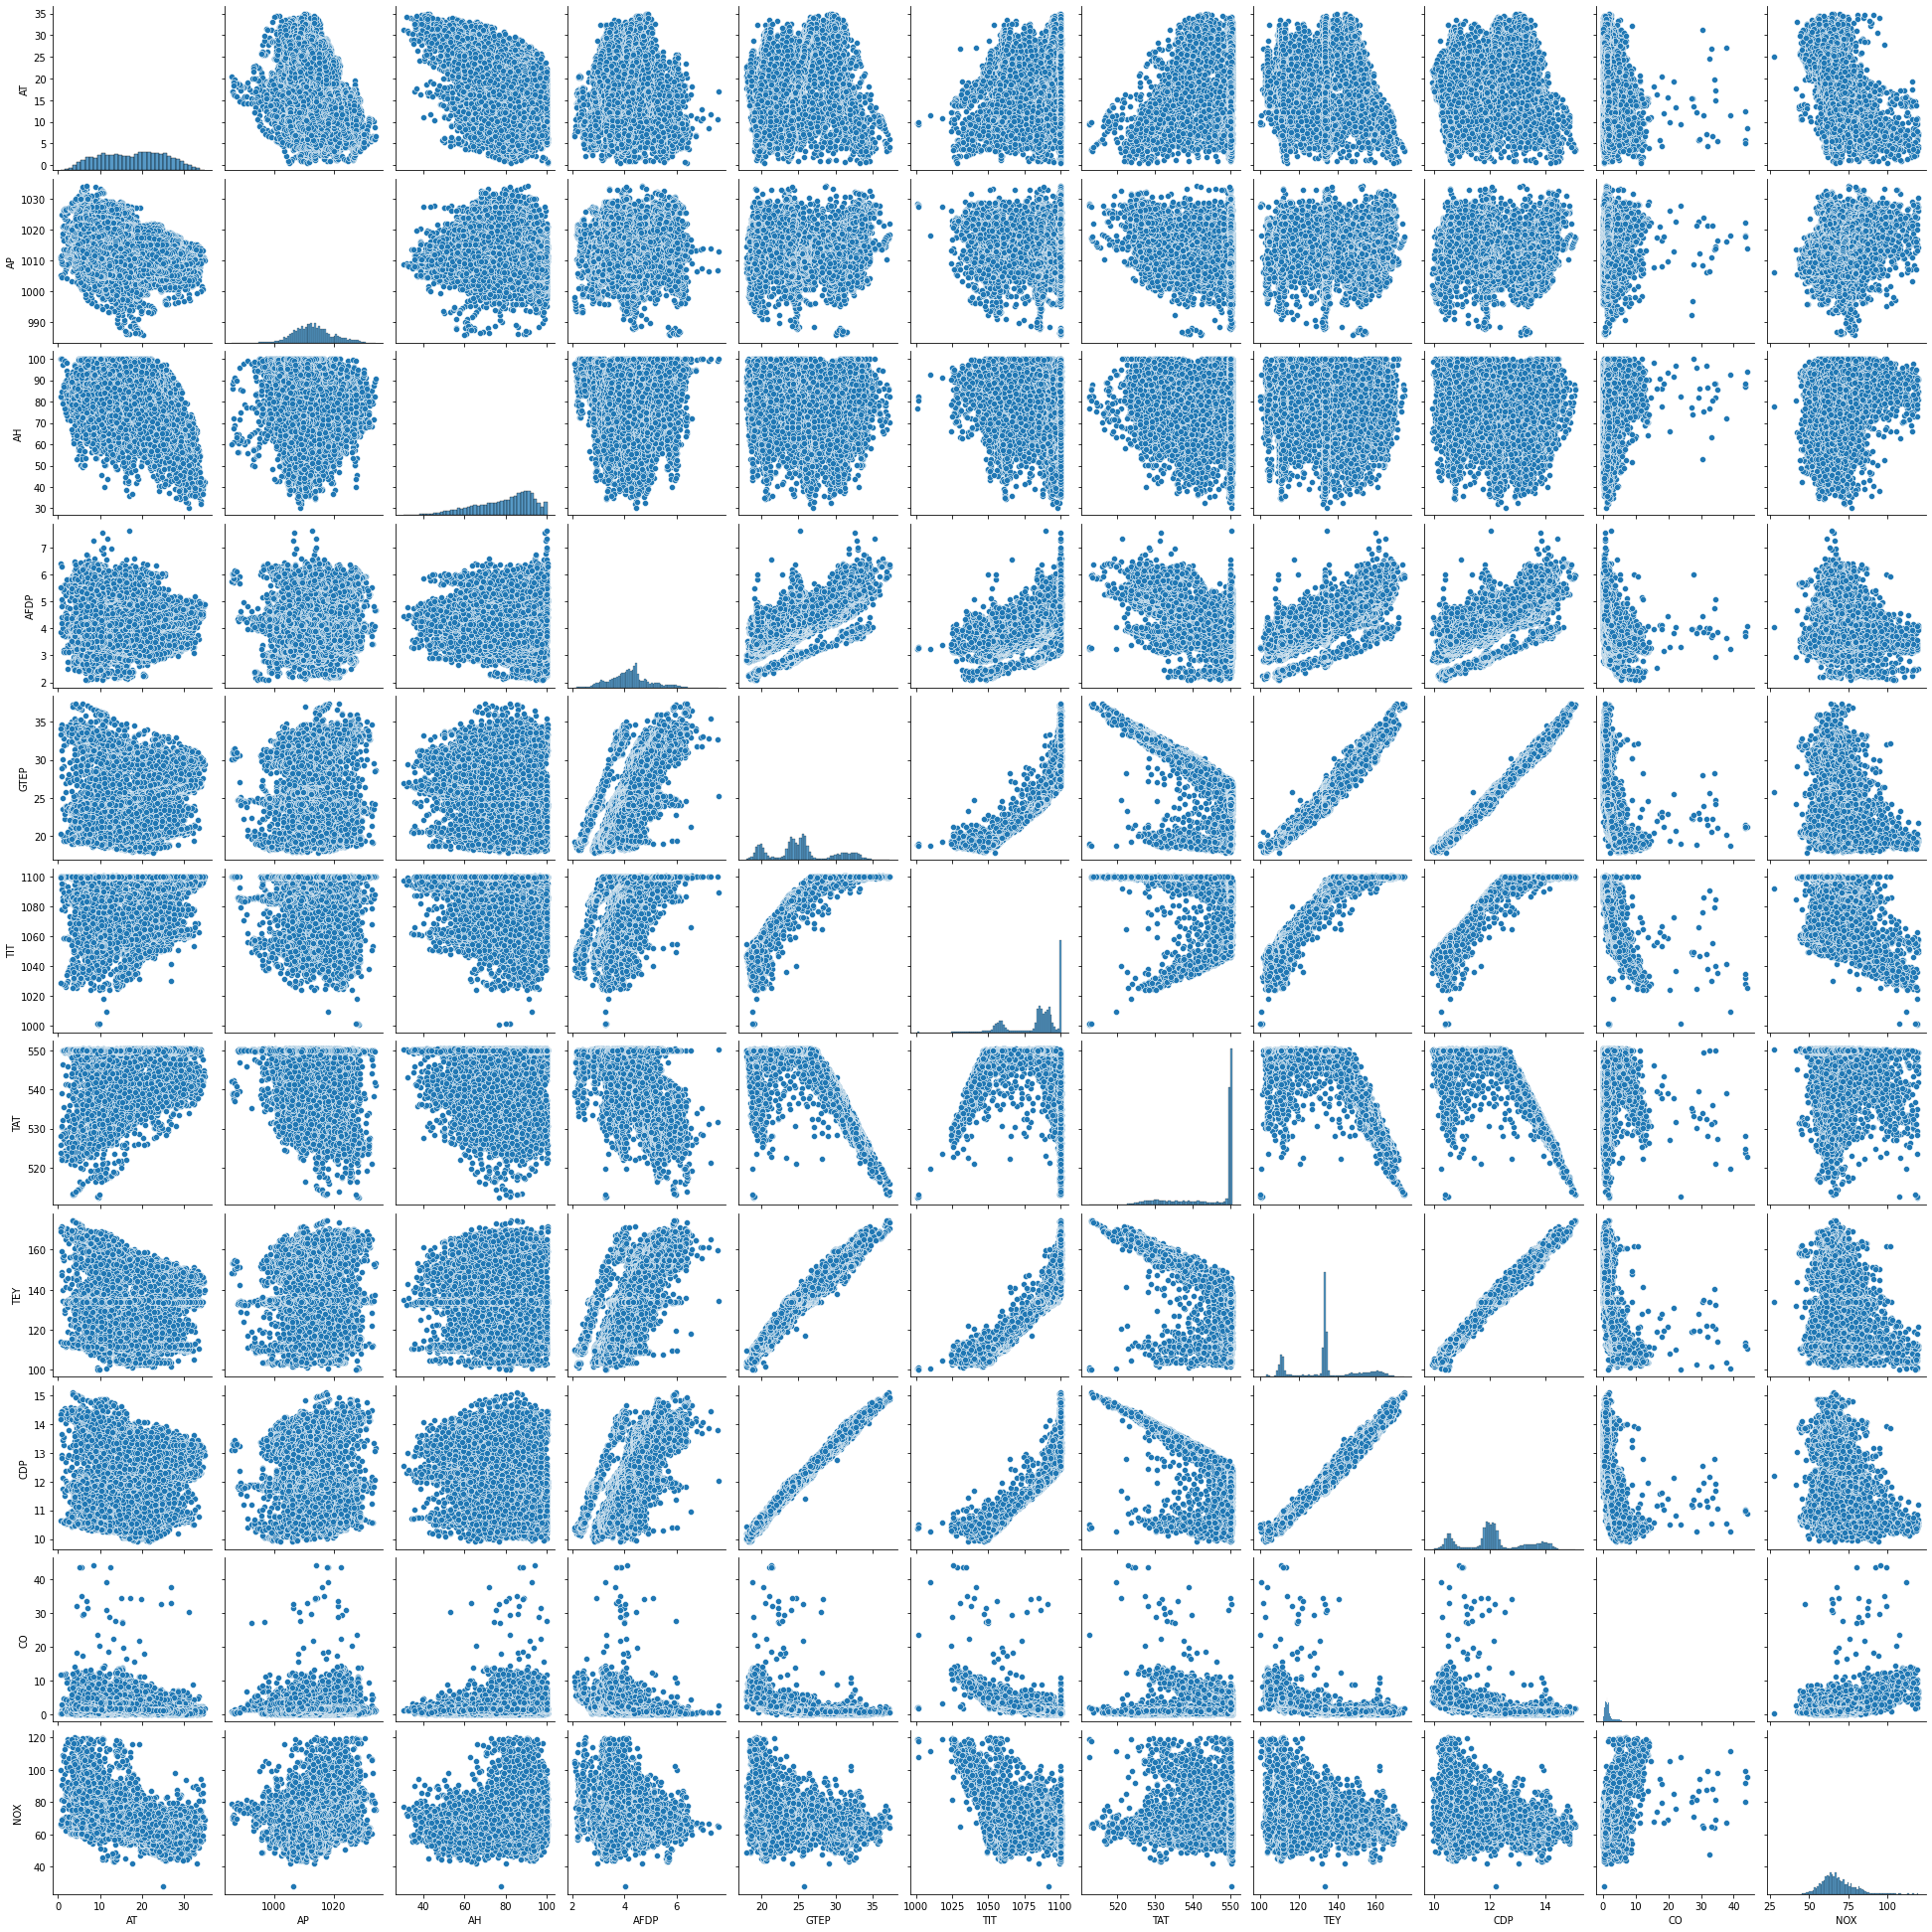

In [9]:
sns.pairplot(data) 

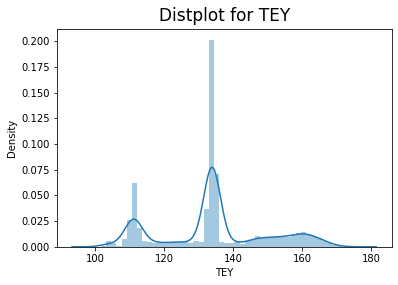

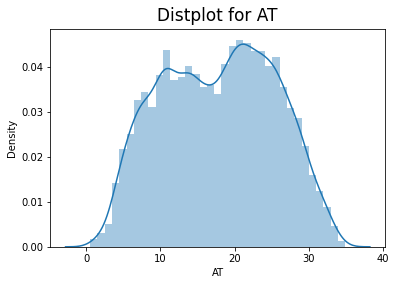

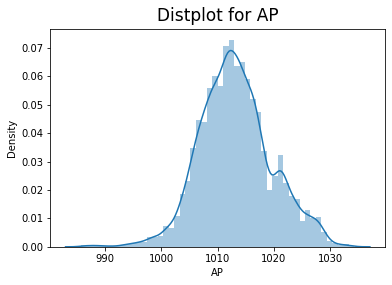

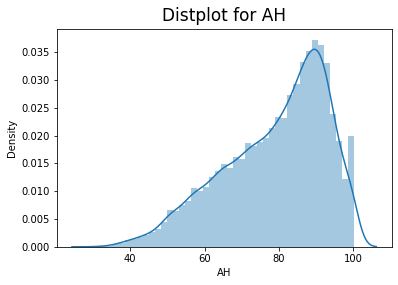

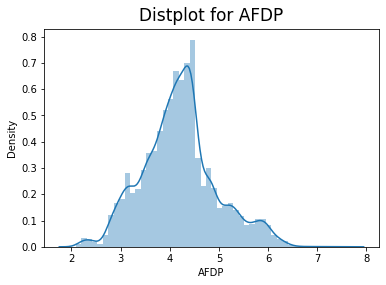

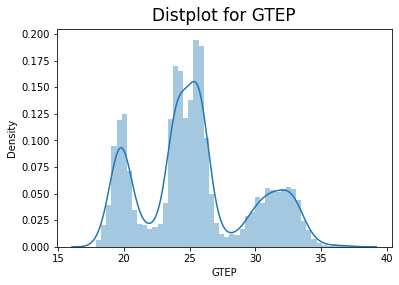

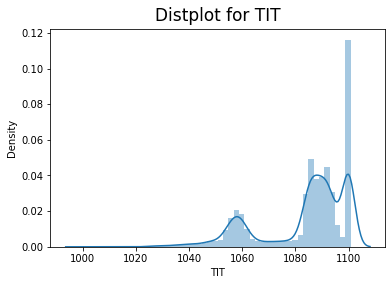

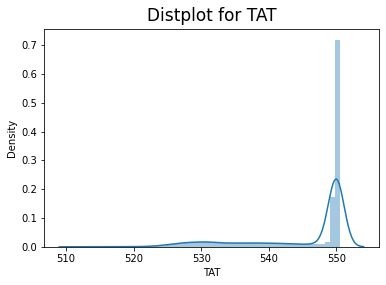

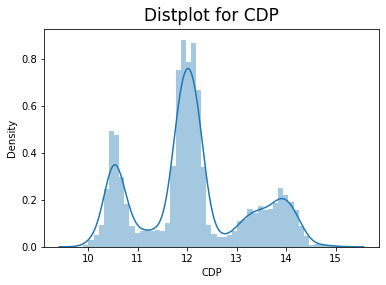

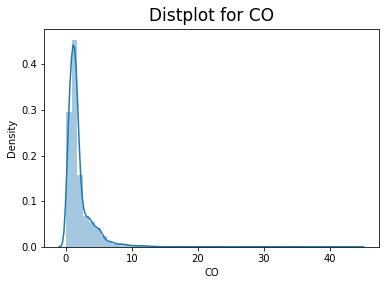

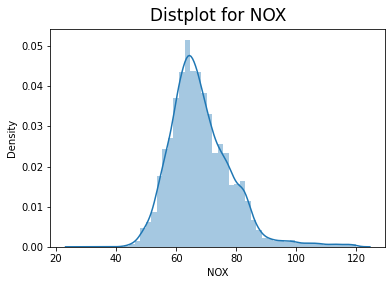

In [10]:
#Target variable
plt.title('Distplot for TEY', fontsize=17, y = 1.01)
sns.distplot(data['TEY'])  
plt.show()

plt.title('Distplot for AT', fontsize=17, y = 1.01)
sns.distplot(data['AT'])
plt.show()

plt.title('Distplot for AP', fontsize=17, y = 1.01)
sns.distplot(data['AP'])
plt.show()
     
plt.title('Distplot for AH', fontsize=17, y = 1.01)
sns.distplot(data['AH'])
plt.show()

plt.title('Distplot for AFDP', fontsize=17, y = 1.01)
sns.distplot(data['AFDP'])
plt.show()

plt.title('Distplot for GTEP', fontsize=17, y = 1.01)
sns.distplot(data['GTEP'])
plt.show()

plt.title('Distplot for TIT', fontsize=17, y = 1.01)
sns.distplot(data['TIT'])
plt.show()

plt.title('Distplot for TAT', fontsize=17, y = 1.01)
sns.distplot(data['TAT'])
plt.show()

plt.title('Distplot for CDP', fontsize=17, y = 1.01)
sns.distplot(data['CDP'])
plt.show()

plt.title('Distplot for CO', fontsize=17, y = 1.01)
sns.distplot(data['CO']) 
plt.show()

plt.title('Distplot for NOX', fontsize=17, y = 1.01)
sns.distplot(data['NOX']) 
plt.show() 


# Correlation

In [11]:
data.corr()

AT        AP        AH      AFDP      GTEP       TIT       TAT  \
AT    1.000000 -0.412953 -0.549432 -0.099333 -0.049103  0.093067  0.338569   
AP   -0.412953  1.000000  0.042573  0.040318  0.078575  0.029650 -0.223479   
AH   -0.549432  0.042573  1.000000 -0.119249 -0.202784 -0.247781  0.010859   
AFDP -0.099333  0.040318 -0.119249  1.000000  0.744251  0.627254 -0.571541   
GTEP -0.049103  0.078575 -0.202784  0.744251  1.000000  0.874526 -0.756884   
TIT   0.093067  0.029650 -0.247781  0.627254  0.874526  1.000000 -0.357320   
TAT   0.338569 -0.223479  0.010859 -0.571541 -0.756884 -0.357320  1.000000   
TEY  -0.207495  0.146939 -0.110272  0.717995  0.977042  0.891587 -0.720356   
CDP  -0.100705  0.131198 -0.182010  0.727152  0.993784  0.887238 -0.744740   
CO   -0.088588  0.041614  0.165505 -0.334207 -0.508259 -0.688272  0.063404   
NOX  -0.600006  0.256744  0.143061 -0.037299 -0.208496 -0.231636  0.009888   

           TEY       CDP        CO       NOX  
AT   -0.207495 -0.100705 -0.088588 -0.600006  
AP    0.146939  0.131198  0.041614  0.256744  
AH   -0.110272 -0.182010  0.165505  0.143061  
AFDP  0.717995  0.727152 -0.334207 -0.037299  
GTEP  0.977042  0.993784 -0.508259 -0.208496  
TIT   0.891587  0.887238 -0.688272 -0.231636  
TAT  -0.720356 -0.744740  0.063404  0.009888  
TEY   1.000000  0.988473 -0.541751 -0.102631  
CDP   0.988473  1.000000 -0.520783 -0.169103  
CO   -0.541751 -0.520783  1.000000  0.316743  
NOX  -0.102631 -0.169103  0.316743  1.000000

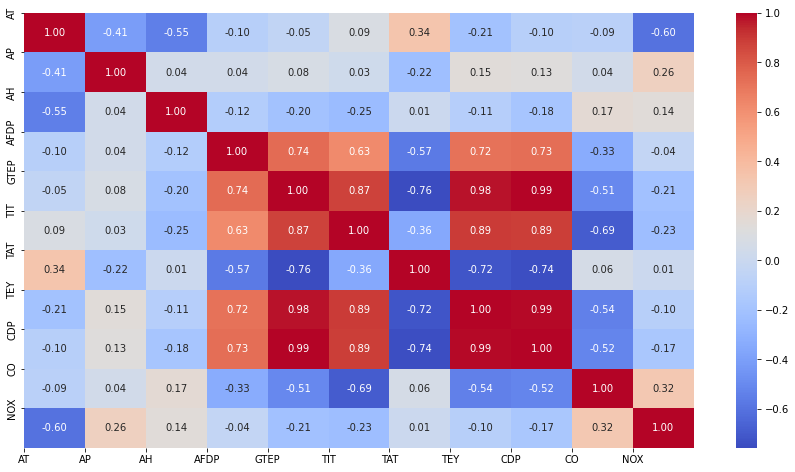

In [12]:
# Heatmap of correlation matrix
corr = data.corr()
fig, ax = plt.subplots(figsize=(15, 8))
#Generate Heat Map, allow annotations and place floats in map
sns.heatmap(corr, cmap='coolwarm', annot=True, fmt=".2f")
plt.xticks(range(len(corr.columns)), corr.columns);
plt.yticks(range(len(corr.columns)), corr.columns)
plt.show() 

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_regression 

In [14]:
X = data.iloc[:,1:]
y = data.iloc[:,0] 

In [15]:
X

AP      AH    AFDP    GTEP     TIT     TAT     TEY     CDP      CO  \
0      1007.9  96.799  3.5000  19.663  1059.2  550.00  114.70  10.605  3.1547   
1      1008.4  97.118  3.4998  19.728  1059.3  550.00  114.72  10.598  3.2363   
2      1008.8  95.939  3.4824  19.779  1059.4  549.87  114.71  10.601  3.2012   
3      1009.2  95.249  3.4805  19.792  1059.6  549.99  114.72  10.606  3.1923   
4      1009.7  95.150  3.4976  19.765  1059.7  549.98  114.72  10.612  3.2484   
...       ...     ...     ...     ...     ...     ...     ...     ...     ...   
15034  1005.6  98.460  3.5421  19.164  1049.7  546.21  111.61  10.400  4.5186   
15035  1005.9  99.093  3.5059  19.414  1046.3  543.22  111.78  10.433  4.8470   
15036  1006.3  99.496  3.4770  19.530  1037.7  537.32  110.19  10.483  7.9632   
15037  1006.8  99.008  3.4486  19.377  1043.2  541.24  110.74  10.533  6.2494   
15038  1007.2  97.533  3.4275  19.306  1049.9  545.85  111.58  10.583  4.9816   

          NOX  
0      82.722  
1      82.776  
2      82.468  
3      82.670  
4      82.311  
...       ...  
15034  79.559  
15035  79.917  
15036  90.912  
15037  93.227  
15038  92.498  

[15039 rows x 10 columns]

In [16]:
y

0        6.8594
1        6.7850
2        6.8977
3        7.0569
4        7.3978
          ...  
15034    9.0301
15035    7.8879
15036    7.2647
15037    7.0060
15038    6.9279
Name: AT, Length: 15039, dtype: float64

In [17]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler() 
scaler.fit(X) 

StandardScaler()

In [18]:
y = StandardScaler().fit_transform(y.values.reshape(len(y),1))[:,0] 
y 

array([-1.4397781 , -1.44960109, -1.43472138, ..., -1.38626659,
       -1.42042259, -1.43073409])

In [19]:
scaled_features = scaler.transform(X)
data_head = pd.DataFrame(scaled_features,columns=X.columns)
data_head 

AP        AH      AFDP      GTEP       TIT       TAT       TEY  \
0     -0.826644  1.281436 -0.921232 -1.379101 -1.488376  0.585240 -1.231172   
1     -0.748647  1.304564 -0.921495 -1.363528 -1.482325  0.585240 -1.229909   
2     -0.686250  1.219086 -0.944385 -1.351309 -1.476275  0.568715 -1.230541   
3     -0.623853  1.169060 -0.946884 -1.348194 -1.464173  0.583969 -1.229909   
4     -0.545857  1.161883 -0.924389 -1.354663 -1.458123  0.582698 -1.229909   
...         ...       ...       ...       ...       ...       ...       ...   
15034 -1.185428  1.401860 -0.865850 -1.498657 -2.063184  0.103453 -1.426381   
15035 -1.138630  1.447753 -0.913470 -1.438759 -2.268905 -0.276638 -1.415642   
15036 -1.076233  1.476971 -0.951488 -1.410967 -2.789257 -1.026650 -1.516089   
15037 -0.998236  1.441590 -0.988848 -1.447624 -2.456474 -0.528337 -1.481343   
15038 -0.935839  1.334652 -1.016605 -1.464635 -2.051083  0.057689 -1.428277   

            CDP        CO       NOX  
0     -1.357331  0.532012  1.387845  
1     -1.363676  0.568733  1.393002  
2     -1.360957  0.552938  1.363586  
3     -1.356424  0.548933  1.382878  
4     -1.350985  0.574179  1.348591  
...         ...       ...       ...  
15034 -1.543161  1.145792  1.085751  
15035 -1.513247  1.293578  1.119943  
15036 -1.467922  2.695925  2.170062  
15037 -1.422598  1.924683  2.391165  
15038 -1.377273  1.354150  2.321539  

[15039 rows x 10 columns]

In [20]:
# Splitting data into test data and train data

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) 

In [21]:
print('Shape of x_train: ', x_train.shape)
print('Shape of x_test: ', x_test.shape)
print('Shape of y_train: ', y_train.shape)
print('Shape of y_test: ', y_test.shape) 

Shape of x_train:  (10527, 10)
Shape of x_test:  (4512, 10)
Shape of y_train:  (10527,)
Shape of y_test:  (4512,)


In [29]:
# feature selection

def select_features(X_train, y_train, X_test): 
    
   # configure to select all features
    fs = SelectKBest(score_func=mutual_info_regression, k='all')
    
    # learn relationship from training data
    fs.fit(X_train, y_train)
    
    # transform train input data
    X_train_fs = fs.transform(X_train)
    
    # transform test input data
    X_test_fs = fs.transform(X_test)
    return X_train_fs, X_test_fs, fs 

In [30]:
# split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)

# feature selection
X_train_fs, X_test_fs, fs = select_features(X_train, y_train, X_test) 

Feature 0: 0.235312
Feature 1: 0.312212
Feature 2: 0.249767
Feature 3: 0.800380
Feature 4: 0.523010
Feature 5: 0.213071
Feature 6: 0.403267
Feature 7: 0.535688
Feature 8: 0.117862
Feature 9: 0.384634


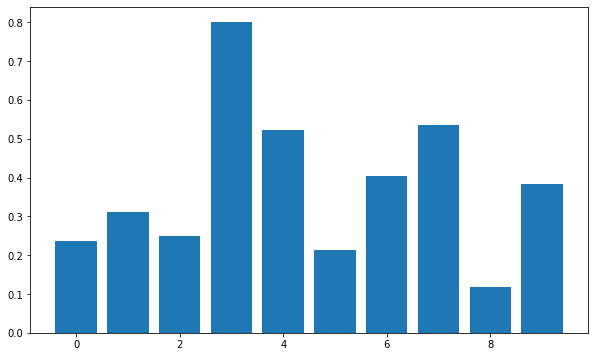

In [31]:
# what are scores for the features
for i in range(len(fs.scores_)):
    print('Feature %d: %f' % (i, fs.scores_[i]))
    
# plot the scores
fig, ax = plt.subplots(figsize=(10, 6))
plt.bar([i for i in range(len(fs.scores_))], fs.scores_)
plt.show() 

In [32]:
X = data.drop(['TEY','AT','AP','AH','CO','NOX'], axis = 1) 
X 

AFDP    GTEP     TIT     TAT     CDP
0      3.5000  19.663  1059.2  550.00  10.605
1      3.4998  19.728  1059.3  550.00  10.598
2      3.4824  19.779  1059.4  549.87  10.601
3      3.4805  19.792  1059.6  549.99  10.606
4      3.4976  19.765  1059.7  549.98  10.612
...       ...     ...     ...     ...     ...
15034  3.5421  19.164  1049.7  546.21  10.400
15035  3.5059  19.414  1046.3  543.22  10.433
15036  3.4770  19.530  1037.7  537.32  10.483
15037  3.4486  19.377  1043.2  541.24  10.533
15038  3.4275  19.306  1049.9  545.85  10.583

[15039 rows x 5 columns]

In [33]:
y = data.iloc[:,0] 
y 

0        6.8594
1        6.7850
2        6.8977
3        7.0569
4        7.3978
          ...  
15034    9.0301
15035    7.8879
15036    7.2647
15037    7.0060
15038    6.9279
Name: AT, Length: 15039, dtype: float64

# Standardizing data

In [34]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler() 
scaler.fit(X)

StandardScaler()

In [35]:
y = StandardScaler().fit_transform(y.values.reshape(len(y),1))[:,0] 
y 

array([-1.4397781 , -1.44960109, -1.43472138, ..., -1.38626659,
       -1.42042259, -1.43073409])

In [36]:
scaled_features = scaler.transform(X)
data_head = pd.DataFrame(scaled_features,columns=X.columns)
data_head 

AFDP      GTEP       TIT       TAT       CDP
0     -0.921232 -1.379101 -1.488376  0.585240 -1.357331
1     -0.921495 -1.363528 -1.482325  0.585240 -1.363676
2     -0.944385 -1.351309 -1.476275  0.568715 -1.360957
3     -0.946884 -1.348194 -1.464173  0.583969 -1.356424
4     -0.924389 -1.354663 -1.458123  0.582698 -1.350985
...         ...       ...       ...       ...       ...
15034 -0.865850 -1.498657 -2.063184  0.103453 -1.543161
15035 -0.913470 -1.438759 -2.268905 -0.276638 -1.513247
15036 -0.951488 -1.410967 -2.789257 -1.026650 -1.467922
15037 -0.988848 -1.447624 -2.456474 -0.528337 -1.422598
15038 -1.016605 -1.464635 -2.051083  0.057689 -1.377273

[15039 rows x 5 columns]

In [37]:
# Splitting data into test data and train data

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) 

In [38]:
print('Shape of x_train: ', x_train.shape)
print('Shape of x_test: ', x_test.shape)
print('Shape of y_train: ', y_train.shape)
print('Shape of y_test: ', y_test.shape) 

Shape of x_train:  (10527, 5)
Shape of x_test:  (4512, 5)
Shape of y_train:  (10527,)
Shape of y_test:  (4512,)


In [39]:
import tensorflow as tf
import keras
from sklearn.model_selection import GridSearchCV, KFold
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasRegressor
from tensorflow.keras.optimizers import Adam
from keras.layers import Dropout
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from tensorflow.keras.optimizers import Adam,RMSprop
from sklearn.model_selection import GridSearchCV,KFold

In [42]:
# creating model
model = Sequential()
model.add(Dense(10, input_dim=5, kernel_initializer='he_uniform', activation='tanh'))
model.add(Dense(6, kernel_initializer='he_uniform', activation='tanh'))
model.add(Dense(1, kernel_initializer='he_uniform', activation='linear'))

In [43]:
# Compile model
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['mse'])

In [44]:
# Fitting the model
model.fit(x_train,y_train, epochs=100, batch_size=40)

Epoch 1/100
264/264 [==============================] - 2s 2ms/step - loss: 1.0139 - mse: 1.0139
Epoch 2/100
264/264 [==============================] - 1s 2ms/step - loss: 1.0018 - mse: 1.0018
Epoch 3/100
264/264 [==============================] - 0s 1ms/step - loss: 1.0017 - mse: 1.0017
Epoch 4/100
264/264 [==============================] - 0s 1ms/step - loss: 1.0020 - mse: 1.0020
Epoch 5/100
264/264 [==============================] - 0s 1ms/step - loss: 1.0019 - mse: 1.0019
Epoch 6/100
264/264 [==============================] - 0s 1ms/step - loss: 1.0021 - mse: 1.0021
Epoch 7/100
264/264 [==============================] - 0s 1ms/step - loss: 1.0029 - mse: 1.0029
Epoch 8/100
264/264 [==============================] - 0s 2ms/step - loss: 1.0022 - mse: 1.0022
Epoch 9/100
264/264 [==============================] - 0s 2ms/step - loss: 1.0038 - mse: 1.0038
Epoch 10/100
264/264 [==============================] - 0s 2ms/step - loss: 1.0029 - mse: 1.0029
Epoch 11/100
264/264 [=================

In [45]:
# evaluate the model
scores = model.evaluate(x_test, y_test)
print((model.metrics_names[1]))

141/141 [==============================] - 1s 3ms/step - loss: 0.9976 - mse: 0.9976
mse


# Artificial Neural Network Model - Tuning of All Hyperparameters
#As dataset contains too many records, it will take much time to get the results. So we will use only first 500 records and try to tune the hyperparameters to get the best results.



In [46]:
# Importing the necessary libraries
from sklearn.model_selection import GridSearchCV, KFold
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasRegressor
from keras.optimizers import adam_v2
from keras.layers import Dropout

In [47]:
X = data.drop(['TEY','AT','AP','AH','CO','NOX'], axis = 1)
y = data.iloc[:,0]  

In [48]:
# Selecting first 500 records
X = X.iloc[0:500,:] 

In [49]:
# Selecting first 500 records
y = y.iloc[0:500]  

In [50]:
# Scaling all the features
scaler.fit(X)
y = StandardScaler().fit_transform(y.values.reshape(len(y),1))[:,0] 

In [51]:
scaled_features=scaler.transform(X)
data_head=pd.DataFrame(scaled_features,columns=X.columns)
data_head 

AFDP      GTEP       TIT       TAT       CDP
0   -1.759902 -1.532845 -2.140879  0.597669 -1.637742
1   -1.760236 -1.516668 -2.132865  0.597669 -1.644533
2   -1.789273 -1.503977 -2.124851  0.584370 -1.641623
3   -1.792443 -1.500741 -2.108824  0.596646 -1.636771
4   -1.763907 -1.507461 -2.100811  0.595623 -1.630950
..        ...       ...       ...       ...       ...
495  0.427695  0.194256 -0.706435 -0.594154 -0.072722
496 -1.244251 -1.463412 -3.919909 -0.777275 -1.760964
497 -1.300155 -1.463661 -3.984018 -0.855025 -1.660057
498 -1.030481 -1.114010 -3.463131 -0.919476 -1.255462
499  0.972718  1.029685  1.144718 -0.334306  0.891710

[500 rows x 5 columns]

In [52]:
# Splitting data into test data and train data

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [53]:
print('Shape of x_train: ', x_train.shape)
print('Shape of x_test: ', x_test.shape)
print('Shape of y_train: ', y_train.shape)
print('Shape of y_test: ', y_test.shape) 

Shape of x_train:  (350, 5)
Shape of x_test:  (150, 5)
Shape of y_train:  (350,)
Shape of y_test:  (150,)


In [54]:
def create_model(learning_rate,dropout_rate,activation_function,init,neuron1,neuron2):
    model = Sequential()
    model.add(Dense(neuron1,input_dim = 5,kernel_initializer = init,activation = activation_function))
    model.add(Dropout(dropout_rate))
    model.add(Dense(neuron2,input_dim = neuron1,kernel_initializer = init,activation = activation_function))
    model.add(Dropout(dropout_rate))
    model.add(Dense(1,activation = 'linear'))
    
    adam=adam_v2.Adam(learning_rate = learning_rate)
    model.compile(loss = 'mean_squared_error',optimizer = adam,metrics = ['mse'])
    return model 

In [55]:
# Create the model
model = KerasRegressor(build_fn = create_model,verbose = 0)


In [56]:
# Define the grid search parameters

batch_size = [20,40]
epochs = [50,100]
learning_rate = [0.01,0.1]
dropout_rate = [0.1,0.2]
activation_function = ['relu','linear']
init = ['uniform','normal']
neuron1 = [4,8]
neuron2 = [2,4]

In [59]:
# Make a dictionary of the grid search parameters

param_grids = dict(batch_size = batch_size,epochs = epochs,learning_rate = learning_rate,dropout_rate = dropout_rate,
                   activation_function = activation_function,init = init,neuron1 = neuron1,neuron2 = neuron2)


In [60]:
# Build and fit the GridSearchCV

grid = GridSearchCV(estimator = model,param_grid = param_grids,cv = KFold(),verbose = 10, scoring='neg_mean_squared_error')
grid_result = grid.fit(x_train, y_train)

# Summarize the results
print('Best : {}, using {}'.format(grid_result.best_score_,grid_result.best_params_)) 

Fitting 5 folds for each of 256 candidates, totalling 1280 fits
[CV 1/5; 1/256] START activation_function=relu, batch_size=20, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.01, neuron1=4, neuron2=2
[CV 1/5; 1/256] END activation_function=relu, batch_size=20, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.01, neuron1=4, neuron2=2;, score=-1.187 total time=   3.7s
[CV 2/5; 1/256] START activation_function=relu, batch_size=20, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.01, neuron1=4, neuron2=2
[CV 2/5; 1/256] END activation_function=relu, batch_size=20, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.01, neuron1=4, neuron2=2;, score=-0.937 total time=   2.5s
[CV 3/5; 1/256] START activation_function=relu, batch_size=20, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.01, neuron1=4, neuron2=2
[CV 3/5; 1/256] END activation_function=relu, batch_size=20, dropout_rate=0.1, epochs=50, init=uniform, learning_rate=0.01, neuron1=4, ne

### So the best results using{'activation_function': 'linear', 'batch_size': 40, 'dropout_rate': 0.2, 'epochs': 100, 'init': 'normal', 'learning_rate': 0.01, 'neuron1': 8, 'neuron2': 2}

## Now creating a new model as per best results of GridSearchCV

In [62]:
final_model = Sequential()
final_model.add(Dense(4,input_dim = 5,kernel_initializer = 'uniform',activation = 'linear'))
final_model.add(Dropout(0.1))
final_model.add(Dense(2,input_dim = 4,kernel_initializer = 'uniform',activation = 'linear'))
final_model.add(Dropout(0.1))
final_model.add(Dense(1,activation = 'linear'))
    
adam=adam_v2.Adam(learning_rate = 0.01)

In [63]:
# Compile Model
final_model.compile(loss = 'mean_squared_error',optimizer = adam,metrics = ['mse'])

In [64]:
# Fit the model
final_model.fit(x_train,y_train, epochs=100, batch_size=20)

Epoch 1/100
18/18 [==============================] - 3s 2ms/step - loss: 0.9994 - mse: 0.9994
Epoch 2/100
18/18 [==============================] - 0s 2ms/step - loss: 1.0037 - mse: 1.0037
Epoch 3/100
18/18 [==============================] - 0s 1ms/step - loss: 0.9972 - mse: 0.9972
Epoch 4/100
18/18 [==============================] - 0s 2ms/step - loss: 0.9976 - mse: 0.9976
Epoch 5/100
18/18 [==============================] - 0s 2ms/step - loss: 0.9954 - mse: 0.9954
Epoch 6/100
18/18 [==============================] - 0s 2ms/step - loss: 0.9963 - mse: 0.9963
Epoch 7/100
18/18 [==============================] - 0s 2ms/step - loss: 0.9945 - mse: 0.9945
Epoch 8/100
18/18 [==============================] - 0s 1ms/step - loss: 0.9959 - mse: 0.9959
Epoch 9/100
18/18 [==============================] - 0s 2ms/step - loss: 0.9943 - mse: 0.9943
Epoch 10/100
18/18 [==============================] - 0s 2ms/step - loss: 0.9946 - mse: 0.9946
Epoch 11/100
18/18 [==============================] - 0s 2m

In [65]:
scores = final_model.evaluate(x_test, y_test)
print((final_model.metrics_names[1]))

5/5 [==============================] - 0s 2ms/step - loss: 1.0173 - mse: 1.0173
mse
